**Imports and Housekeeping**

In [39]:
import psycopg2
import sqlalchemy

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

%matplotlib inline

import numpy as np
import pandas as pd

from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

from pprint import pprint


import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

**Establishing connection to PostgresSQL Server**

In [3]:
from sqlalchemy import create_engine

# Postgres username, password, and database name
POSTGRES_ADDRESS = 'localhost'
POSTGRES_PORT = '5432'
POSTGRES_USERNAME = 'postgres' 
POSTGRES_PASSWORD = 'abcd1234' 
POSTGRES_DBNAME = 'FIFA' 

# A long string that contains the necessary Postgres login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'\
.format(username=POSTGRES_USERNAME,\
password=POSTGRES_PASSWORD,\
ipaddress=POSTGRES_ADDRESS,\
port=POSTGRES_PORT,\
dbname=POSTGRES_DBNAME))

# Create the connection
cnx = create_engine(postgres_str)

**Checking out the structure of the dataset in 2020**

In [4]:
df = pd.read_sql_query('''SELECT * FROM players_20;''', cnx)
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023.0,https://sofifa.com/player/158023/lionel-messi/20/159586,L. Messi,Lionel Andrés Messi Cuccittini,32.0,1987-06-24,170.0,72.0,Argentina,FC Barcelona,94.0,94.0,95500000.0,565000.0,"RW, CF, ST",Left,5.0,4.0,4.0,Medium/Low,Messi,True,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Forward",RW,10.0,None,2004-07-01,2021.0,None,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Early Crosser, Finesse Shot, Speed Dribbler (CPU AI Only), 1-on-1 Rush, Giant Throw-in, Outside Foot Shot",88.0,95.0,70.0,92.0,88.0,97.0,93.0,94.0,92.0,96.0,91.0,84.0,93.0,95.0,95.0,86.0,68.0,75.0,68.0,94.0,48.0,40.0,94.0,94.0,75.0,96.0,33.0,37.0,26.0,6.0,11.0,15.0,14.0,8.0,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801.0,https://sofifa.com/player/20801/c-ronaldo-dos-santos-aveiro/20/159586,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34.0,1985-02-05,187.0,83.0,Portugal,Juventus,93.0,93.0,58500000.0,405000.0,"ST, LW",Right,5.0,4.0,5.0,High/Low,C. Ronaldo,True,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acrobat, #Clinical Finisher, #Complete Forward",LW,7.0,None,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials, Early Crosser, Speed Dribbler (CPU AI Only), Skilled Dribbling",84.0,94.0,89.0,83.0,87.0,89.0,81.0,76.0,77.0,92.0,89.0,91.0,87.0,96.0,71.0,95.0,95.0,85.0,78.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,32.0,24.0,7.0,11.0,15.0,14.0,11.0,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871.0,https://sofifa.com/player/190871/neymar-da-silva-santos-jr/20/159586,Neymar Jr,Neymar da Silva Santos Junior,27.0,1992-02-05,175.0,68.0,Brazil,Paris Saint-Germain,92.0,92.0,105500000.0,290000.0,"LW, CAM",Right,5.0,5.0,5.0,High/Medium,Neymar,True,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser, #FK Specialist, #Acrobat, #Clinical Finisher, #Complete Midfielder, #Complete Forward",CAM,10.0,None,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early Crosser, Speed Dribbler (CPU AI Only), Crowd Favourite",87.0,87.0,62.0,87.0,87.0,96.0,88.0,87.0,81.0,95.0,94.0,89.0,96.0,92.0,84.0,80.0,61.0,81.0,49.0,84.0,51.0,36.0,87.0,90.0,90.0,94.0,27.0,26.0,29.0,9.0,9.0,15.0,15.0,11.0,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389.0,https://sofifa.com/player/200389/jan-oblak/20/159586,J. Oblak,Jan 

In [5]:
list(df.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'nationality',
 'club',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'player_positions',
 'preferred_foot',
 'international_reputation',
 'weak_foot',
 'skill_moves',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'team_position',
 'team_jersey_number',
 'loaned_from',
 'joined',
 'contract_valid_until',
 'nation_position',
 'nation_jersey_number',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_reflexes',
 'gk_speed',
 'gk_positioning',
 'player_traits',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agility',
 'movement_re

In [6]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,24.000000,15.000000,24.000000,23.000000,15.000000,27.000000,44.000000,42.000000,35.000000,45.000000,12.000000,41.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,5.000000,12.000000,11.000000,11.000000,21.000000,12.000000,14.000000,19.000000,12.000000,20.000000,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,61.000000,42.000000,50.000000,57.000000,36.000000,59.000000,60.000000,58.000000,57.000000,60.750000,29.000000,58.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,54.000000,56.000000,57.

**EDA for young players**

We choose some key attributes for younger players.

In [7]:
df = pd.read_sql_query('''SELECT short_name, age, international_reputation, nationality, club, value_eur, wage_eur,
overall, potential, split_part(player_positions, ',', 1) as position,
pace, shooting, passing, dribbling, defending, physic
FROM players_20
WHERE age <= 22;''', cnx)

In [8]:
df.head()

,short_name,age,international_reputation,nationality,club,value_eur,wage_eur,overall,potential,position,pace,shooting,passing,dribbling,defending,physic
0,K. Mbappé,20.0,3.0,France,Paris Saint-Germain,93500000.0,155000.0,89.0,95.0,ST,96.0,84.0,78.0,90.0,39.0,75.0
1,M. de Ligt,19.0,3.0,Netherlands,Juventus,50000000.0,76000.0,85.0,93.0,CB,67.0,58.0,66.0,68.0,83.0,84.0
2,G. Donnarumma,20.0,3.0,Italy,Milan,41500000.0,34000.0,85.0,92.0,GK,NaN,NaN,NaN,NaN,NaN,NaN
3,F. de Jong,22.0,3.0,Netherlands,FC Barcelona,52000000.0,195000.0,85.0,91.0,CM,79.0,64.0,84.0,87.0,76.0,76.0
4,J. Sancho,19.0,2.0,England,Borussia Dortmund,44500000.0,61000.0,84.0,92.0,RM,88.0,72.0,77.0,90.0,36.0,60.0


In [9]:
df.describe()

,age,international_reputation,value_eur,wage_eur,overall,potential,pace,shooting,passing,dribbling,defending,physic
count,5960.000000,5960.000000,5.960000e+03,5960.000000,5960.000000,5960.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000
mean,20.208221,1.007550,1.386448e+06,4521.308725,61.581376,73.500000,68.476102,47.621919,52.573376,59.615758,46.217886,58.962845
std,1.461286,0.100894,3.542800e+06,10270.084010,6.508060,6.044196,9.107901,12.918009,9.874697,10.273925,15.609382,9.480016
min,16.000000,1.000000,0.000000e+00,0.000000,48.000000,53.000000,33.000000,19.000000,24.000000,26.000000,15.000000,27.000000
25%,19.000000,1.000000,1.800000e+05,1000.000000,57.000000,69.000000,62.000000,37.000000,46.000000,54.000000,32.000000,52.000000
50%,20.000000,1.000000,4.500000e+05,2000.000000,61.000000,73.000000,68.000000,49.000000,53.000000,61.000000,49.000000,59.000000
75%,21.000000,1.000000,9.750000e+05,4000.000000,66.000000,78.000000,75.000000,58.000000,59.000000,66.000000,59.000000,66.000000
max,22.000000,3.000000,9.350000e+07,195000.000000,89.000000,95.000000,96.000000,84.000000,84.000000,90.000000,83.000000,88.000000


Let's check the number of NULL attributes

In [10]:
df.isnull().sum()

short_name                  0  
age                         0  
international_reputation    0  
nationality                 0  
club                        0  
value_eur                   0  
wage_eur                    0  
overall                     0  
potential                   0  
position                    0  
pace                        604
shooting                    604
passing                     604
dribbling                   604
defending                   604
physic                      604
dtype: int64

604 records across the same 6 attributes? Let's select these players.

In [11]:
dfnulls = pd.read_sql_query('''SELECT short_name, age, international_reputation, nationality
, club, value_eur, wage_eur,
overall, potential, split_part(player_positions, ',', 1) as position,
pace, shooting, passing, dribbling, defending, physic
FROM players_20
WHERE pace is NULL;''', cnx)

In [12]:
dfnulls.head(10)

,short_name,age,international_reputation,nationality,club,value_eur,wage_eur,overall,potential,position,pace,shooting,passing,dribbling,defending,physic
0,J. Oblak,26.0,3.0,Slovenia,Atlético Madrid,77500000.0,125000.0,91.0,93.0,GK,None,None,None,None,None,None
1,M. ter Stegen,27.0,3.0,Germany,FC Barcelona,67500000.0,250000.0,90.0,93.0,GK,None,None,None,None,None,None
2,Alisson,26.0,3.0,Brazil,Liverpool,58000000.0,155000.0,89.0,91.0,GK,None,None,None,None,None,None
3,De Gea,28.0,4.0,Spain,Manchester United,56000000.0,205000.0,89.0,90.0,GK,None,None,None,None,None,None
4,Ederson,25.0,2.0,Brazil,Manchester City,54500000.0,185000.0,88.0,91.0,GK,None,None,None,None,None,None
5,T. Courtois,27.0,4.0,Belgium,Real Madrid,48000000.0,235000.0,88.0,89.0,GK,None,None,None,None,None,None
6,S. Handanovič,34.0,3.0,Slovenia,Inter,26000000.0,110000.0,88.0,88.0,GK,None,None,None,None,None,None
7,M. Neuer,33.0,5.0,Germany,FC Bayern München,32000000.0,155000.0,88.0,88.0,GK,None,None,None,None,None,None
8,H. Lloris,32.0,4.0,France,Tottenham Hotspur,36000000.0,150000.0,88.0,88.0,GK,None,None,None,None,None,None
9,K. Navas,32.0,3.0,Costa Rica,Real Madrid,30500000.0,195000.0,87.0,87.0,GK,None,None,None,None,None,None


They all seem to be goalkeepers! That's understandable as goalkeepers have vastly different skills to outfield players.

Let's plot the data to see some distributions. We also want to see how much they resemble the normal distribution. Because life is easier when stuff is normal, right? (We know that all too well now XD)

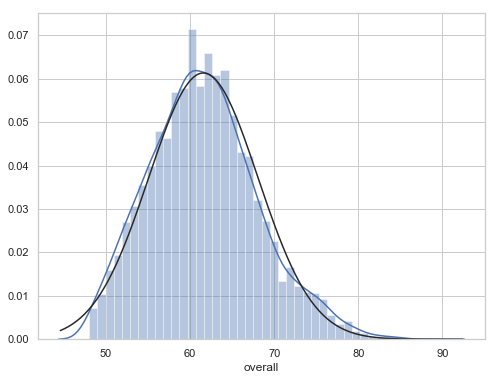

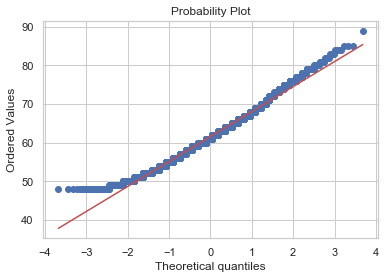

In [13]:
f, ax = plt.subplots(figsize=(8,6))
x = df['overall']
ax = sns.distplot(x, fit= norm)
plt.show()
ax = stats.probplot(x, plot=plt)
plt.show()

This distribution has some amount of right skew. Let's verify that numerically.

In [14]:
print("Skewness: %f" % df['overall'].skew())
print("Kurtosis: %f" % df['overall'].kurt())

Skewness: 0.382077
Kurtosis: 0.054289


The kurtosis sure does explain some amount of the tail-heaviness we're seeing! Otherwise, it's pretty normal.

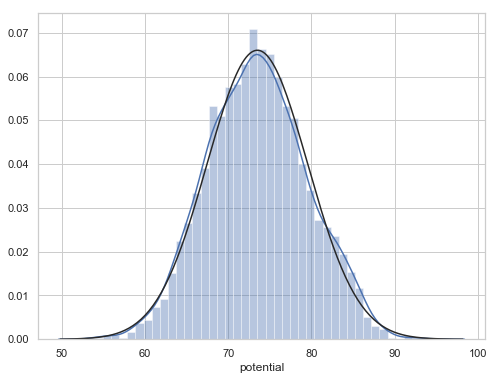

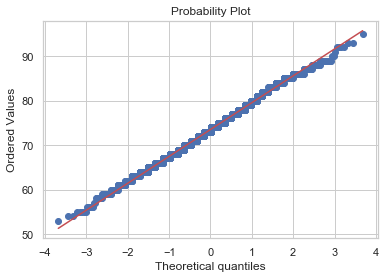

In [18]:
f, ax = plt.subplots(figsize=(8,6))
x = df['potential']
ax = sns.distplot(x, fit = norm)
plt.show()
ax = stats.probplot(x, plot=plt)
plt.show()

In [19]:
print("Skewness: %f" % df['potential'].skew())
print("Kurtosis: %f" % df['potential'].kurt())

Skewness: 0.059589
Kurtosis: -0.216518


This distribution is more symmetrical, and has less of a tail-y nature. Possibly less outliers. Normal distributions are always noice!

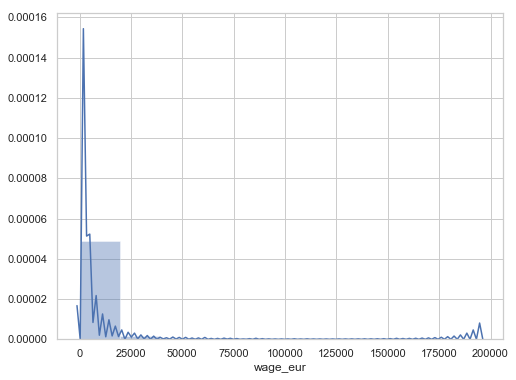

In [20]:
f, ax = plt.subplots(figsize=(8,6))
x = df['wage_eur']
ax = sns.distplot(x, bins=10)
plt.show()

Whoah. There is a huge wage gap in association football! The top few players earn **FAR** more than the rest.

Let's check this out by plotting the Overall attribute against Wages.

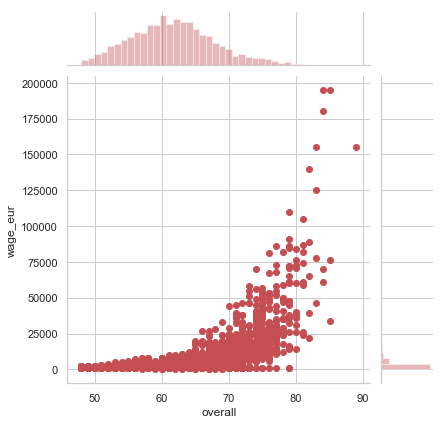

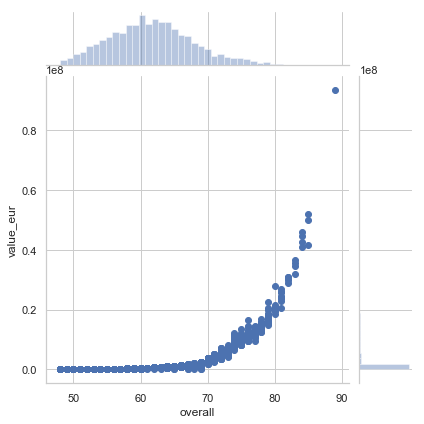

In [21]:
g1 = sns.jointplot(x = "overall", y= "wage_eur", color = "r",  data=df)
g2 = sns.jointplot(x = "overall", y= "value_eur", data=df)


Any guesses as to who that outlier in blue is? (You know we're thinking the same thing. Yes, Mbappe is **THAT** amazing)

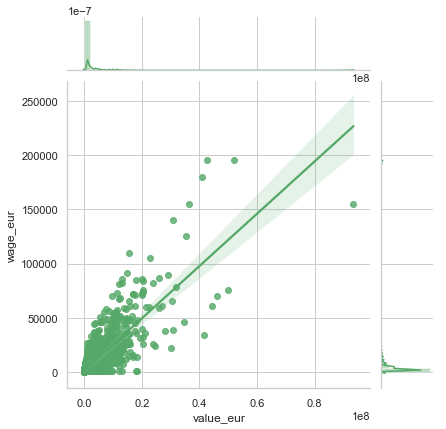

In [23]:
g3 = sns.jointplot(x = "value_eur", y= "wage_eur", kind = "reg",color = "g", data=df)

Apart from the outliers, we can't really see the trend in this plot. Though it does seem to have some cooccurrence.

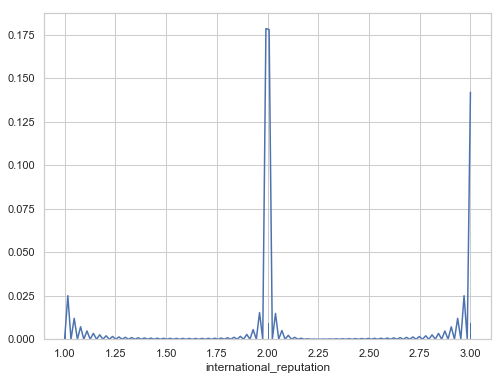

In [24]:
f, ax = plt.subplots(figsize=(8,6))
x = df['international_reputation']
ax = sns.distplot(x, kde = True, hist = False,  rug= True)
plt.show()

There is a huge spike of players with a reputation value of 2. It might be worth investigating how international reputation relates to other attributes.

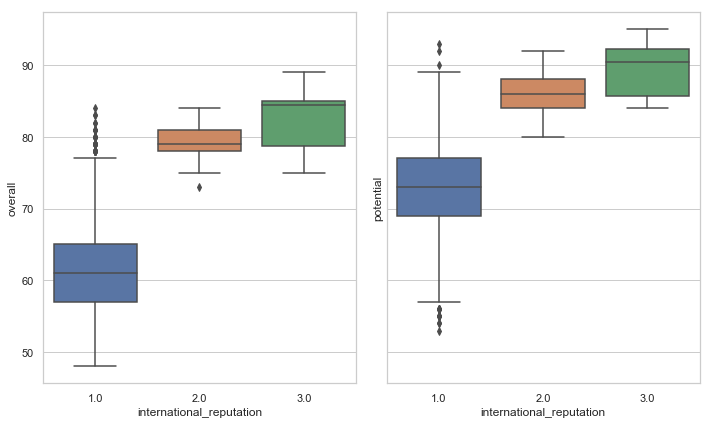

In [25]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 6))

sns.boxplot(x="international_reputation", y="overall", data=df, ax= ax[0])
sns.boxplot(x="international_reputation", y="potential", data=df, ax= ax[1])


plt.tight_layout()
plt.show()


As expected, more reputation means more potential. We also see quite a few outliers above and below the boxes!

Let's check out potentials and overalls per position!

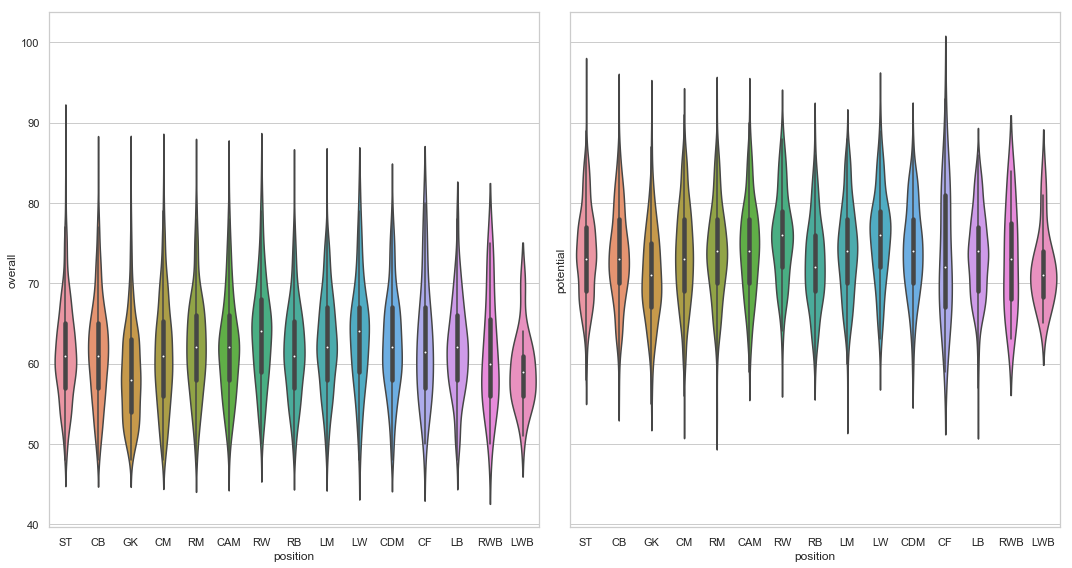

In [26]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 8))

sns.violinplot(x="position", y="overall",data=df, ax = ax[0])
sns.violinplot(x="position", y="potential",data=df, ax = ax[1])

plt.tight_layout()
plt.show()

See the huge spreads in some of these? The potentials and overalls are all over the place! Our trusty boxplot might show us the big number of outliers.

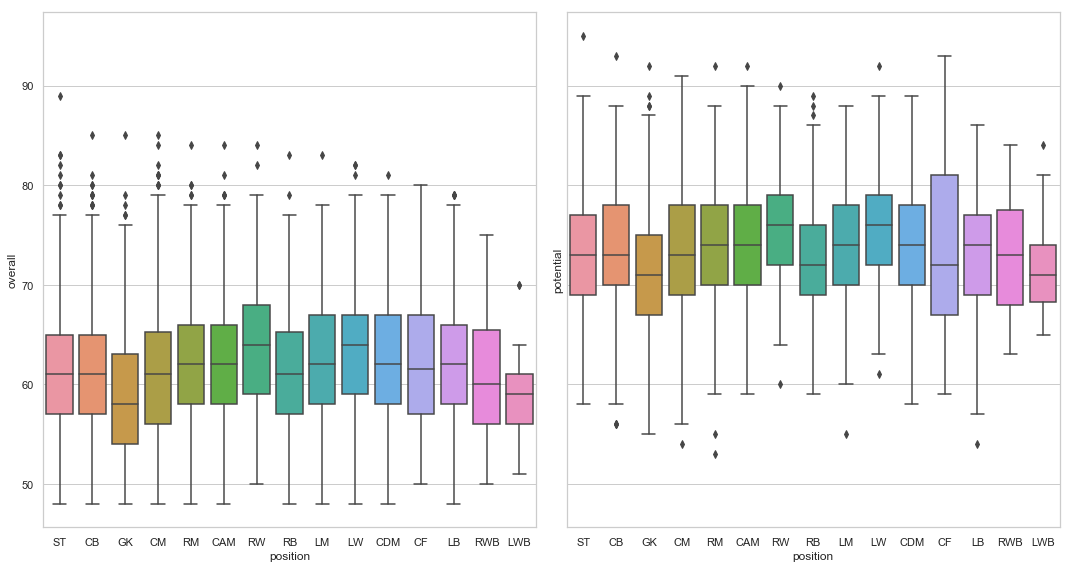

In [27]:
f, ax = plt.subplots(1, 2, sharey=True, figsize=(15, 8))

sns.boxplot(x="position", y="overall",data=df, ax = ax[0])
sns.boxplot(x="position", y="potential",data=df, ax = ax[1])

plt.tight_layout()
plt.show()

There we go. Plenty of outliers, above and below the boxes. We're going to have to clean them when we get to making predictions.

Let's see the distribution of counts themselves.

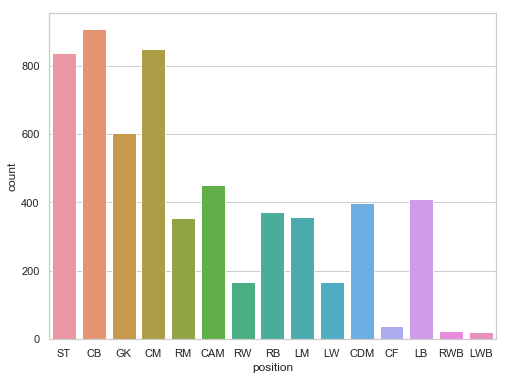

In [28]:
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="position", data=df)
plt.show()

Players in RW/LW, CF and LWB/RWB are very low in count. A question is, would it be worth converting them into their second preferred position?

Let's compare Overall and Potential directly!

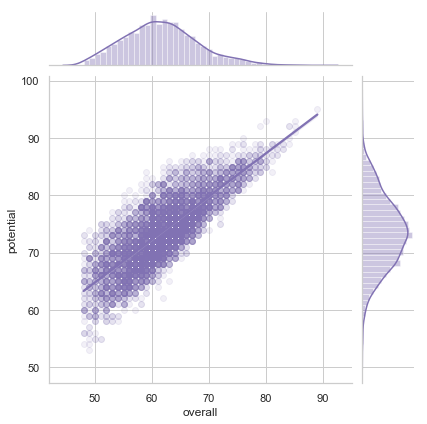

In [29]:

g= sns.jointplot(x="overall", y="potential", kind = "reg", data=df, color = "m", scatter_kws={'alpha':0.1})


A very clear linear trend. We got lucky with these attributes! Potential is a sure-shot way of predicting the Overall.

Let's check out how the base stats are related to each other!

In [30]:
dfbase = df[['overall','potential','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'position']]

Generalizing the positions a bit. (Because honestly, when have you last thought of someone as a wing back?)

In [31]:
def posmap(pos):
    if pos in ['ST', 'CF', 'LW', 'RW']:
        return 'ATT'
    elif pos == 'GK':
        return 'GK'
    elif pos in ['CB', 'LB', 'RB', 'LWB', 'RWB']:
        return 'DEF'
    else:
        return 'MID'

In [32]:
dfbase['overall_position'] = dfbase['position'].apply(lambda row: posmap(row) )

In [33]:
dfbase.head()

,overall,potential,pace,shooting,passing,dribbling,defending,physic,position,overall_position
0,89.0,95.0,96.0,84.0,78.0,90.0,39.0,75.0,ST,ATT
1,85.0,93.0,67.0,58.0,66.0,68.0,83.0,84.0,CB,DEF
2,85.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,GK,GK
3,85.0,91.0,79.0,64.0,84.0,87.0,76.0,76.0,CM,MID
4,84.0,92.0,88.0,72.0,77.0,90.0,36.0,60.0,RM,MID


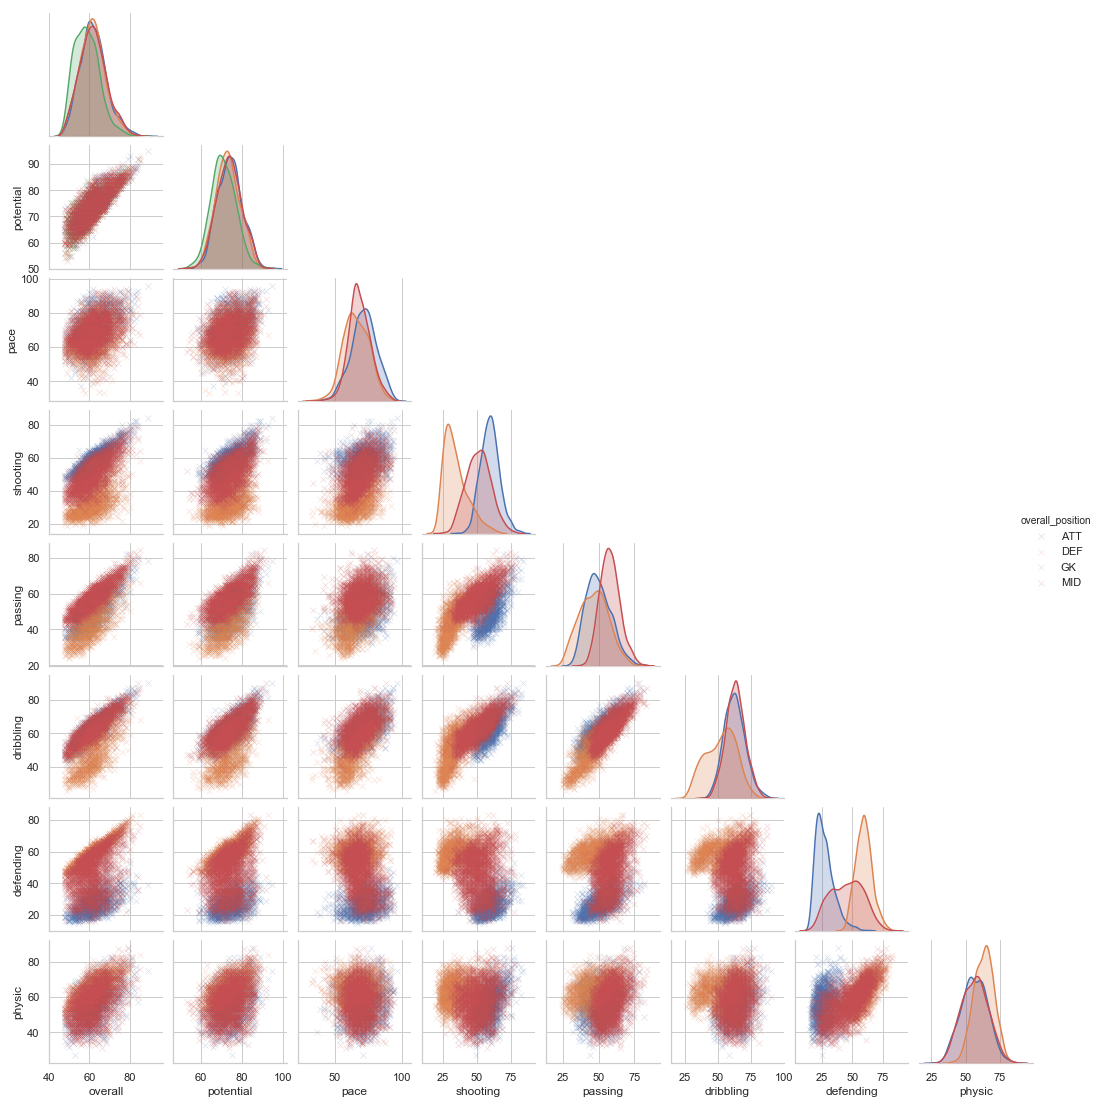

In [34]:
g = sns.pairplot(dfbase,  kind = "scatter", hue = "overall_position", markers = "x" \
                 , diag_kind = "kde", corner=True,plot_kws= dict(alpha = 0.2) )
g.fig.set_size_inches(15,15)

That is a lot of information to take in at the same time. Some linear trends, some not. Obviously the three outfield player categories have very different distributions. See how the three colors are clustered differently in some of these plots?


Perhaps their correlation will help us understand it!
We can then come back here.

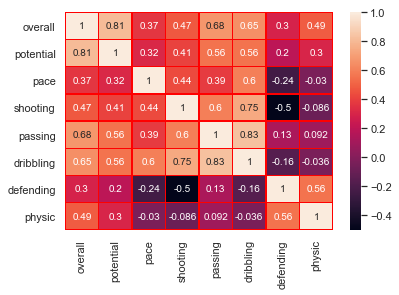

In [35]:
sns.heatmap(dfbase.corr(), annot = True, linecolor = "red", linewidths = 0.5);

Not too many specific trends. Too many players with different roles. Obviously, potential helps. 

Let's concentrate on players by position!

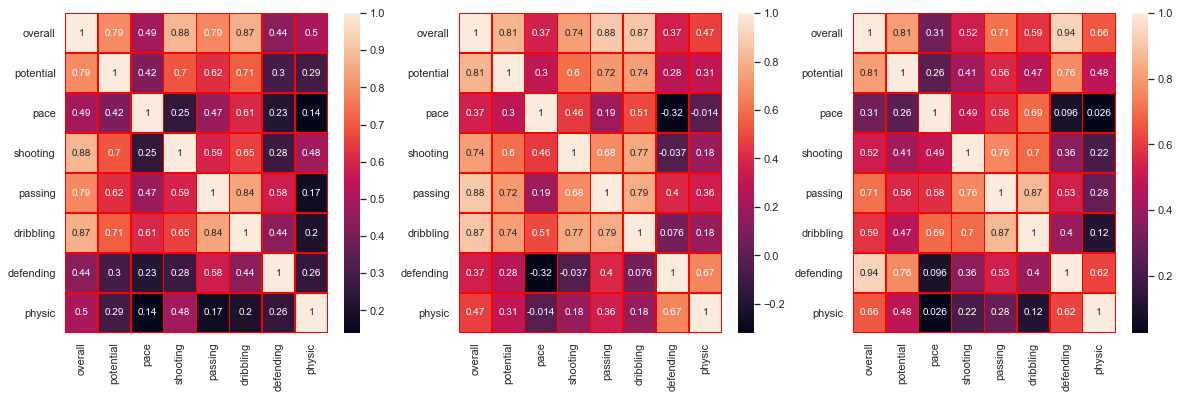

In [36]:
fig = plt.figure(figsize = (20,20)) 
ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax2 = fig.add_subplot(3, 3, 2)
ax3 = fig.add_subplot(3, 3, 3)

sns.heatmap(dfbase[ dfbase.overall_position == 'ATT' ].corr(), ax = ax1, annot = True, linecolor = "red",linewidths = 0.5);
sns.heatmap(dfbase[ dfbase.overall_position == 'MID' ].corr(), ax = ax2, annot = True, linecolor = "red",linewidths = 0.5);
sns.heatmap(dfbase[ dfbase.overall_position == 'DEF' ].corr(), ax = ax3, annot = True, linecolor = "red",linewidths = 0.5);


A clear insight into linear trends! Time to dive into detail.

Let's fit an OLS regressor to predict the overall rating, and see a summary of some statistical properties, for the attacking positions.

In [42]:
x = dfbase[ dfbase.overall_position == 'ATT' ][['potential','pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
y = dfbase[ dfbase.overall_position == 'ATT' ]['overall']

In [43]:
x = sm.add_constant(x)
regressor = sm.OLS(y,x)

In [44]:
results = regressor.fit()

In [46]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     3731.
Date:                Thu, 23 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:11:11   Log-Likelihood:                -2098.7
No. Observations:                1212   AIC:                             4213.
Df Residuals:                    1204   BIC:                             4254.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5674      0.529     -2.962      0.003      -2.605      -0.529
potential      0.1283      0.010     12.303      0.000       0.108       0.149
pace           0.0271      0.006      4.912      0.000       0.016       0.038
shooting       0.3762      0.010     37.540      0.000       0.357       0.396
passing        0.0946      0.009      9.988      0.000       0.076       0.113
dribbling      0.2919      0.012     24.483      0.000       0.269       0.315
defending      0.0076      0.007      1.127      0.260      -0.006       0.021
physic         0.1167      0.005     22.934      0.000       0.107       0.127
==============================================================================
Omnibus:                       13.818   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.217
Skew:                          -0.059   Prob(JB):                     2.47e-05
Kurtosis:                       3.637   Cond. No.                     2.11e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Whoah. Let's see what we can say.

* The adjusted R-square metric says that 95.6% of the variance in the overall rating is explained by the features chosen.
* The F-statistic also indicates linear relation b/w our chosen features and target variable.
* The large p-value (and the small coefficient) for defending shows that it is not statistically significant for our analysis.

And here's some stuff that shows why it may not be a good idea to move on with an OLS approach, and look into nonlinear models.

* We want the errors in our prediction to be normally distributed, ideally.
* The prob(Omnibus) performs a statistical test indicating the probability that the residuals are normally distributed. It's shockingly low.
* Like the warning says, the condition number indicates that some of our features are actually pretty correlated. Time for some feature selection and fancier models?